In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from scipy import integrate
import pandas as pd

In [2]:
def interp(x1,y1,x2,y2, x):
    m = (y2-y1)/(x2-x1)
    return y1 + m*(x-x1)


def rand_beta(t):
    α = 0.05 # Infectiousness scaling factor
    t0 = np.random.rand() + 2.5
    Vpeak = np.random.rand()*4 + 7
    tpeak = t0 + 0.2 + np.random.gamma(1.8)
    tf = tpeak + np.random.rand()*5 + 5
    
    if t0 < t <= tpeak:
        conc = interp(t0,3,tpeak,Vpeak,t)
        if conc >= 6:
            return α*conc
    elif tpeak < t <= tf:
        conc = interp(tpeak,Vpeak,tf,6,t)
        if conc >= 6:
            return α*conc
    return 0

In [8]:
days = pd.read_csv("Incident_Infections_10000.csv").to_numpy()[:,1:]

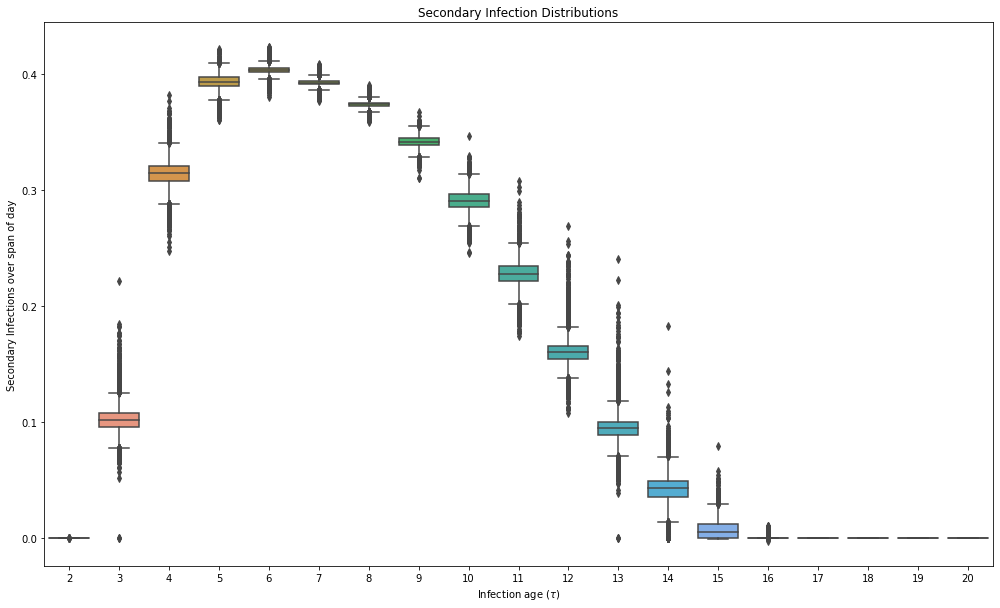

In [12]:
fig, ax = plt.subplots(figsize=(17,10))
sns.boxplot(data=days, orient='v', ax = ax)
plt.xticks(np.arange(0,19),np.arange(2,21))
plt.title("Secondary Infection Distributions")
plt.xlabel(r"Infection age ($\tau$)")
plt.ylabel("Secondary Infections over span of day")
plt.show()

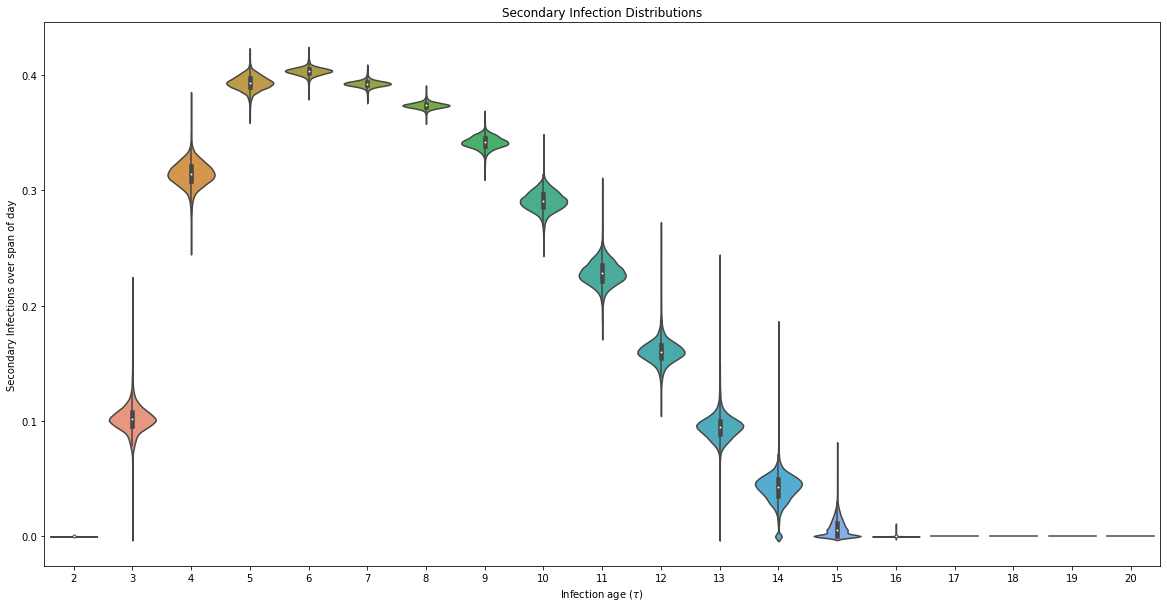

In [14]:
plt.figure(figsize=(20,10))
sns.violinplot(data=days, scale='width')
plt.xticks(np.arange(0,19),np.arange(2,21))
plt.title("Secondary Infection Distributions")
plt.xlabel(r"Infection age ($\tau$)")
plt.ylabel("Secondary Infections over span of day")
plt.show()